In [29]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [14]:
data = pd.read_csv("C:/Users/patan/DS/Machine Learning/Dataset/train.csv", usecols = ['Age','Fare','Survived'])
print(data.shape)
data.head()

(891, 3)


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [16]:
X = data.drop(columns = "Survived")

In [17]:
y = data["Survived"]

In [19]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2 , shuffle = False )
X_train

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
707,42.0,26.2875
708,22.0,151.5500
709,NaN,15.2458
710,24.0,49.5042


In [20]:
X_train["Imputed_Age"] = X_train["Age"]
X_test["Imputed_Age"] = X_test["Age"]

In [22]:
X_train

,Age,Fare,Imputed_Age
0,22.0,7.2500,22.0
1,38.0,71.2833,38.0
2,26.0,7.9250,26.0
3,35.0,53.1000,35.0
4,35.0,8.0500,35.0
...,...,...,...
707,42.0,26.2875,42.0
708,22.0,151.5500,22.0
709,NaN,15.2458,NaN
710,24.0,49.5042,24.0


In [27]:
X_train["Imputed_Age"][X_train["Imputed_Age"].isnull()] = X_train["Age"].dropna().sample(X_train["Age"].isnull().sum())

In [28]:
X_train

,Age,Fare,Imputed_Age
0,22.0,7.2500,22.0
1,38.0,71.2833,38.0
2,26.0,7.9250,26.0
3,35.0,53.1000,35.0
4,35.0,8.0500,35.0
...,...,...,...
707,42.0,26.2875,42.0
708,22.0,151.5500,22.0
709,NaN,15.2458,58.0
710,24.0,49.5042,24.0


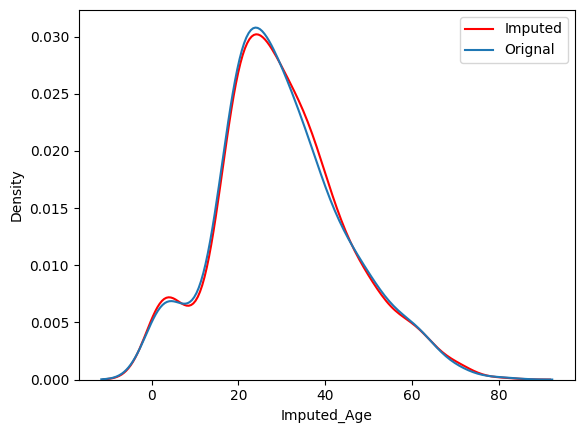

In [42]:
sns.kdeplot(X_train["Imputed_Age"],label = "Imputed" , color = "red")
sns.kdeplot(X_train["Age"],label = "Orignal" )

plt.legend()

<Axes: >

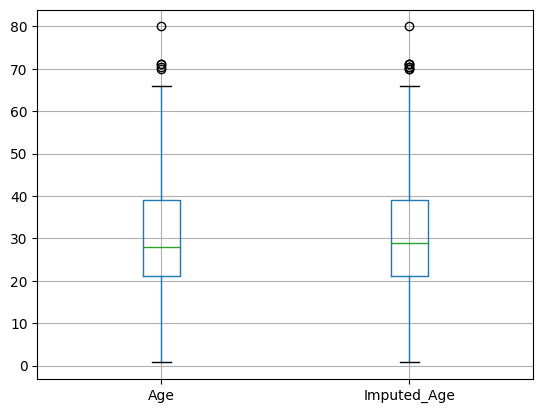

In [44]:
X_train[["Age","Imputed_Age"]].boxplot()

In [46]:
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

TypeError: cannot convert the series to <class 'int'>